*This notebook contains an analysis of Rep-seq data for Cohort I, beta shain.*


In [1]:
import os
import re


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trbv_matrix = pd.read_csv('trbv_matrix_batch.csv').drop('Unnamed: 0', axis=1)
trbv_matrix

,TRBV6-4*01,TRBV12-4*01,TRBV6-6*01,TRBV30*01,TRBV3-1*01,TRBV6-3*01,TRBV10-3*01,TRBV5-8*01,TRBV7-1*01,TRBV18*01,...,TRBV23-1*01,TRBV11-3*01,TRBV5-7*01,TRBV20-1*01,TRBV10-1*01,TRBV7-9*01,TRBV21-1*01,TRBV5-6*01,TRBV14*01,TRBV25-1*01
0,0.013509,0.000799,0.016995,0.034788,0.028324,0.0,0.017939,0.007117,0.000000,0.022950,...,0.005229,0.007117,0.000799,0.064856,0.007989,0.039582,0.017358,0.020917,0.009078,0.005810
1,0.008890,0.001014,0.020120,0.037043,0.020822,0.0,0.011698,0.004913,0.000078,0.035327,...,0.005381,0.014739,0.001248,0.091866,0.008968,0.038447,0.019496,0.019028,0.012322,0.008656
2,0.014107,0.000564,0.017944,0.014107,0.019242,0.0,0.014502,0.007731,0.000000,0.030471,...,0.007787,0.012301,0.000677,0.075951,0.007223,0.040345,0.015912,0.018057,0.011003,0.006151
3,0.024415,0.001361,0.013526,0.027818,0.028073,0.0,0.017780,0.005359,0.000000,0.026882,...,0.007826,0.007401,0.001021,0.091791,0.008507,0.043471,0.021693,0.017865,0.012590,0.011484
4,0.006885,0.001721,0.015491,0.018072,0.024957,0.0,0.020654,0.005164,0.000000,0.018933,...,0.006885,0.006024,0.000000,0.086059,0.017212,0.055077,0.017212,0.021515,0.015491,0.010327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.007690,0.001709,0.018513,0.015095,0.018798,0.0,0.013671,0.006836,0.000000,0.034748,...,0.004842,0.013386,0.001424,0.076047,0.009684,0.039875,0.023355,0.013671,0.019937,0.005412
233,0.015102,0.000604,0.014860,0.017398,0.037695,0.0,0.018606,0.007007,0.000000,0.026338,...,0.007249,0.005920,0.001329,0.078531,0.011961,0.039265,0.018123,0.018243,0.012202,0.006403
234,0.024217,0.002088,0.013779,0.019624,0.016284,0.0,0.016701,0.009186,0.000000,0.021294,...,0.007098,0.008351,0.000000,0.096868,0.006263,0.032568,0.012526,0.016284,0.012109,0.007516
235,0.015696,0.000000,0.017809,0.034712,0.009055,0.0,0.022638,0.006942,0.000000,0.011772,...,0.006037,0.005735,0.002113,0.101419,0.009055,0.032599,0.012375,0.031391,0.010866,0.003018


In [3]:
trbj_matrix = pd.read_csv('trbj_matrix_batch.csv').drop('Unnamed: 0', axis=1)
trbj_matrix

,TRBJ2-7*01,TRBJ2-1*01,TRBJ1-1*01,TRBJ2-5*01,TRBJ1-6*01,TRBJ2-3*01,TRBJ2-2P*01,TRBJ1-3*01,TRBJ2-6*01,TRBJ1-2*01,TRBJ1-4*01,TRBJ1-5*01,TRBJ2-4*01,TRBJ2-2*01
0,0.185199,0.054688,0.209456,0.025855,0.059264,0.037475,0.0,0.048006,0.022224,0.163556,0.058973,0.097102,0.003704,0.034498
1,0.227794,0.073852,0.164314,0.020120,0.063714,0.027061,0.0,0.052874,0.022772,0.155736,0.060048,0.100678,0.004211,0.026827
2,0.153369,0.101794,0.139939,0.069800,0.053211,0.086221,0.0,0.037806,0.020370,0.135368,0.048076,0.086616,0.011680,0.055750
3,0.185028,0.165972,0.129562,0.051723,0.050532,0.067120,0.0,0.037006,0.020162,0.098426,0.047044,0.076138,0.009188,0.062101
4,0.160069,0.084337,0.156627,0.038726,0.071429,0.052496,0.0,0.044750,0.012909,0.175559,0.063683,0.098967,0.003442,0.037005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.100826,0.146682,0.108801,0.095699,0.041299,0.131017,0.0,0.033609,0.023070,0.108516,0.039020,0.074623,0.023070,0.073768
233,0.238130,0.072732,0.153437,0.027425,0.062100,0.037936,0.0,0.043011,0.026821,0.126978,0.059804,0.110306,0.004108,0.037212
234,0.205846,0.137370,0.108977,0.053862,0.051357,0.086848,0.0,0.032985,0.022965,0.100626,0.051357,0.093946,0.007098,0.046764
235,0.117718,0.046785,0.223363,0.011772,0.085119,0.017809,0.0,0.045578,0.034410,0.170238,0.079686,0.134923,0.001509,0.031090


# V genes

Histograms of the use of each of the genes

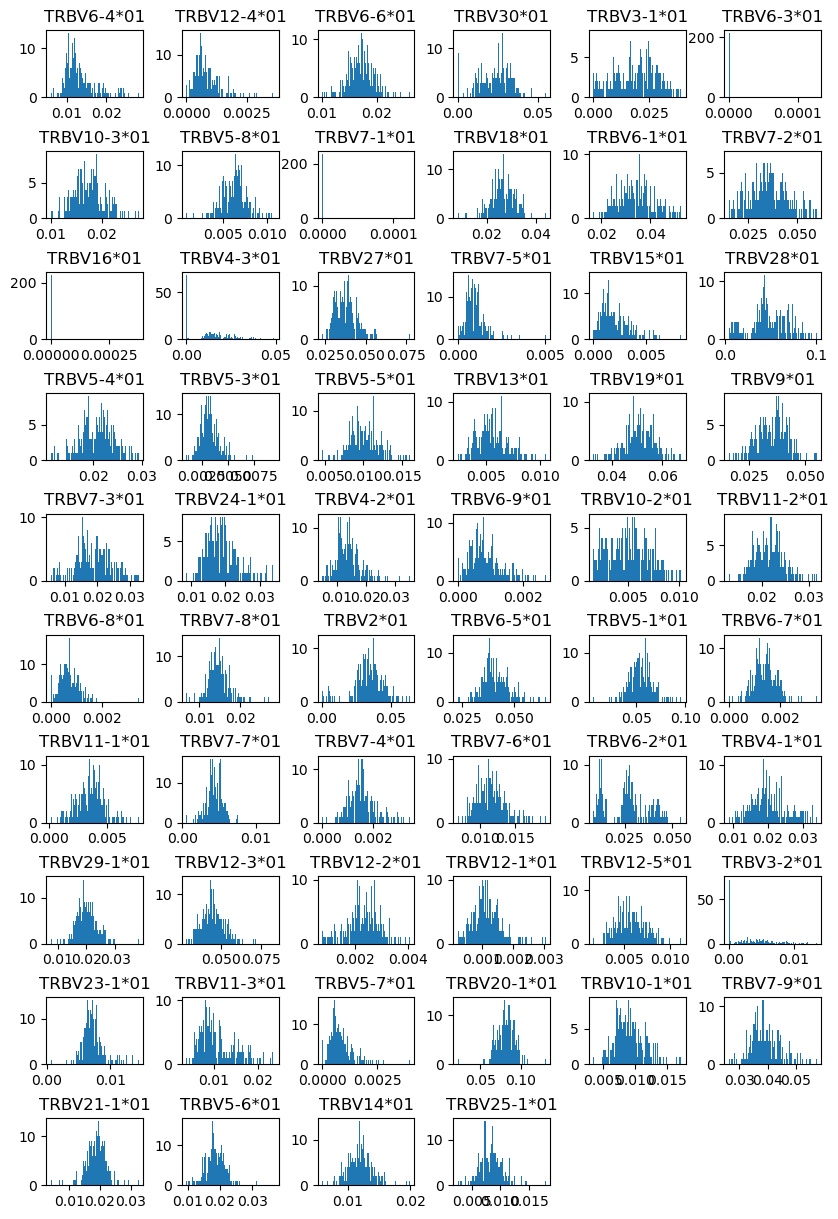

In [4]:
plt.figure(figsize=(10,15))

for i, column in enumerate(trbv_matrix.columns):
    plt.subplot(10, 6, i+1)
    plt.hist(x=trbv_matrix[column], bins=100)
    plt.title(f'{column}') 
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()

Let's take a closer look at the genes TRBV7-1, TRBV16, TRBV4-3, TRBV6-3, TRBV3-2.

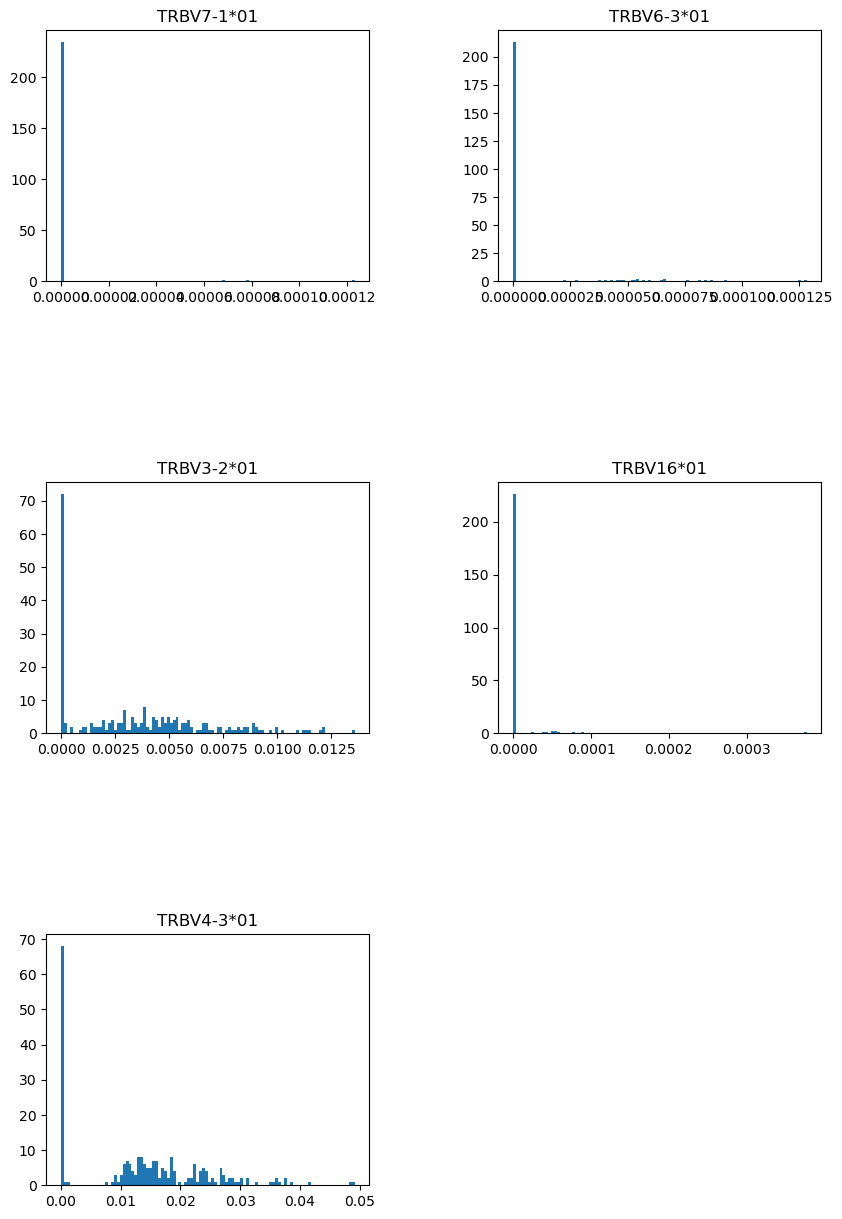

In [5]:
columns_to_use = ['TRBV7-1*01', 'TRBV6-3*01', 'TRBV3-2*01', 'TRBV16*01', 'TRBV4-3*01']

plt.figure(figsize=(10,15))

for i, column in enumerate(trbv_matrix[columns_to_use]):
    plt.subplot(3, 2, i+1)
    plt.hist(x=trbv_matrix[column], bins=100)
    plt.title(f'{column}') 
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()

In [6]:
print(trbv_matrix['TRBV7-1*01'].value_counts(), 
      trbv_matrix['TRBV6-3*01'].value_counts(),
      trbv_matrix['TRBV16*01'].value_counts())

TRBV7-1*01
0.000000    234
0.000078      1
0.000123      1
0.000069      1
Name: count, dtype: int64 TRBV6-3*01
0.000000    213
0.000128      1
0.000046      1
0.000027      1
0.000049      1
0.000052      1
0.000041      1
0.000065      1
0.000092      1
0.000081      1
0.000054      1
0.000023      1
0.000055      1
0.000038      1
0.000066      1
0.000054      1
0.000087      1
0.000043      1
0.000059      1
0.000065      1
0.000125      1
0.000077      1
0.000057      1
0.000084      1
0.000046      1
Name: count, dtype: int64 TRBV16*01
0.000000    226
0.000052      1
0.000054      1
0.000039      1
0.000050      1
0.000024      1
0.000377      1
0.000056      1
0.000087      1
0.000057      1
0.000078      1
0.000044      1
Name: count, dtype: int64


These genes can definitely be removed, but with TRBV3-2, TRBV4-3, we need to think about it. But for now, we'll delete them too.

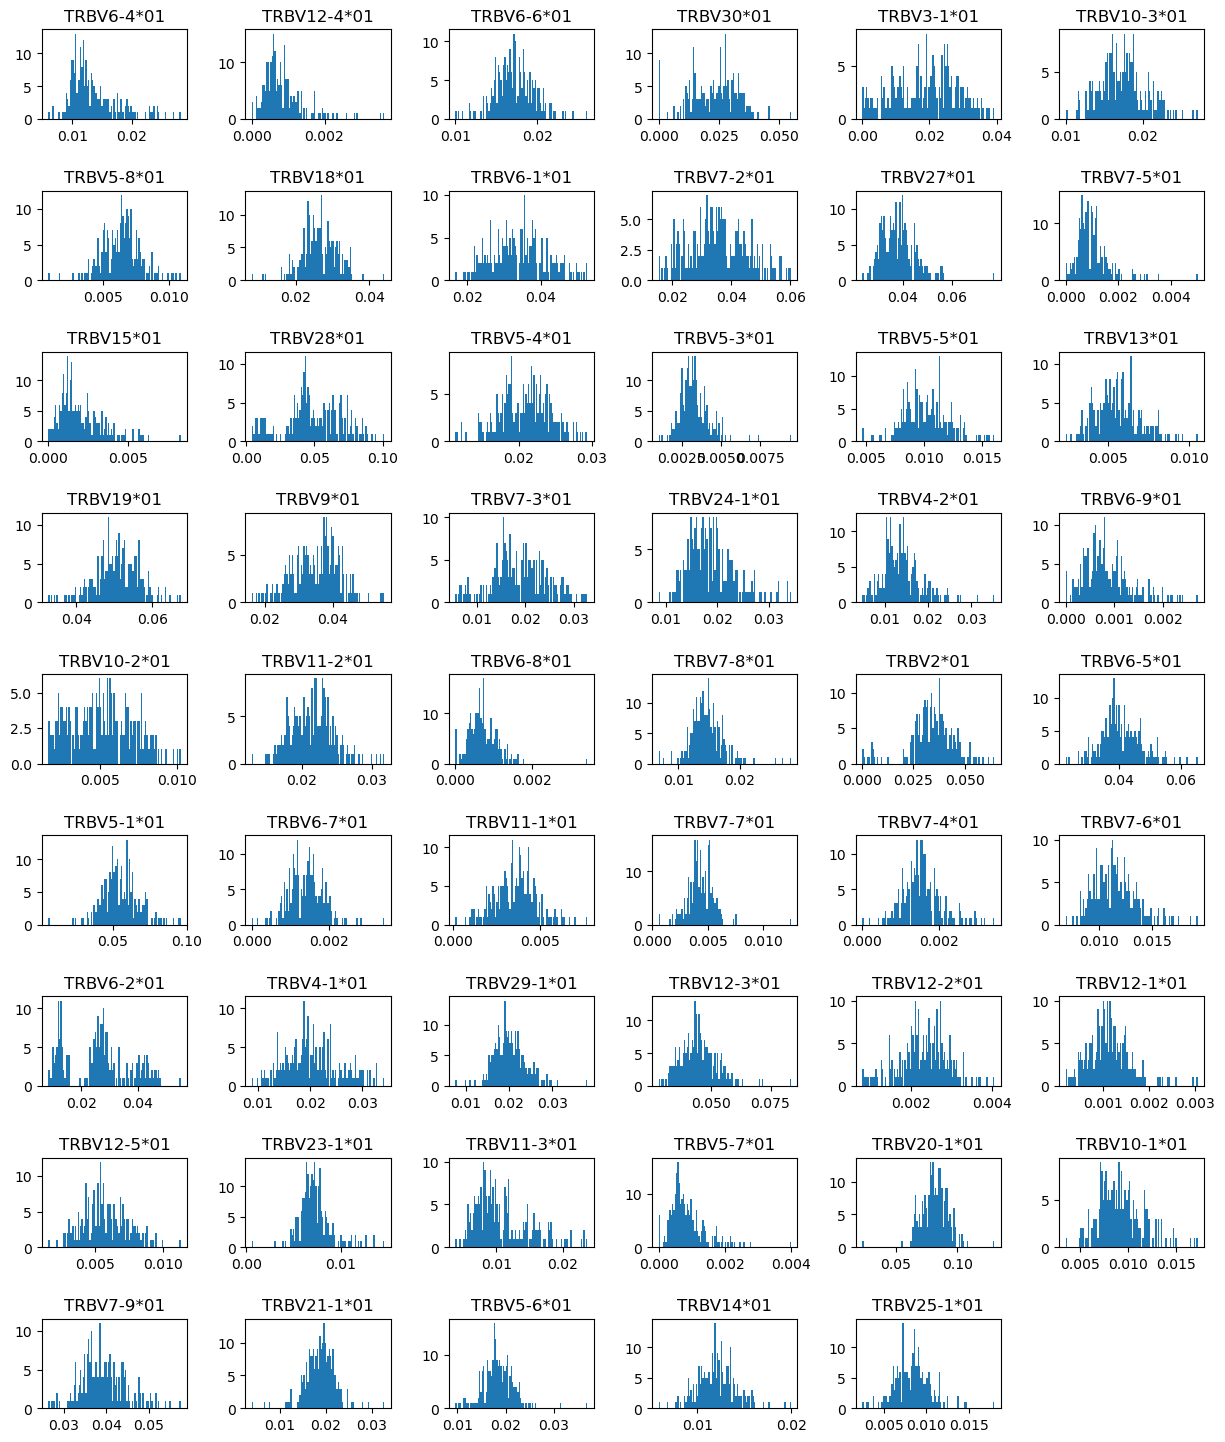

In [7]:
trbv_matrix_filtered = trbv_matrix.copy()
trbv_matrix_filtered = trbv_matrix_filtered.drop(['TRBV7-1*01', 'TRBV6-3*01', 'TRBV3-2*01', 'TRBV16*01', 'TRBV4-3*01'], axis=1)

plt.figure(figsize=(15,20))

for i, column in enumerate(trbv_matrix_filtered.columns):
    plt.subplot(10, 6, i+1)
    plt.hist(x=trbv_matrix_filtered[column], bins=100)
    plt.title(f'{column}') 
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()

# J genes

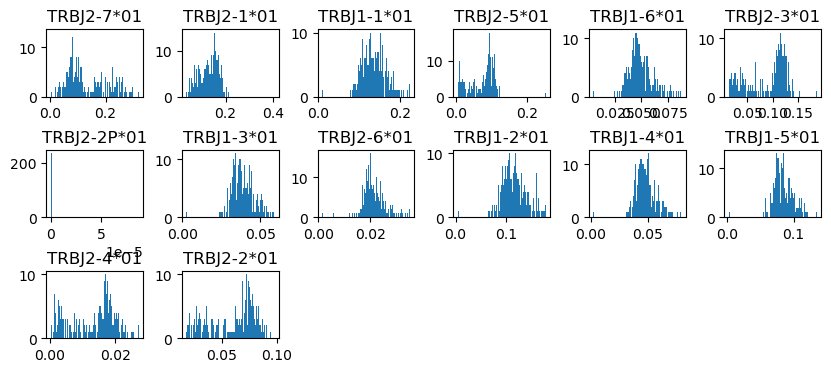

In [8]:
plt.figure(figsize=(10,15))

for i, column in enumerate(trbj_matrix.columns):
    plt.subplot(10, 6, i+1)
    plt.hist(x=trbj_matrix[column], bins=100)
    plt.title(f'{column}') 
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()

The TRBJ2-2P gene is a pseudo-gene, it can be deleted.

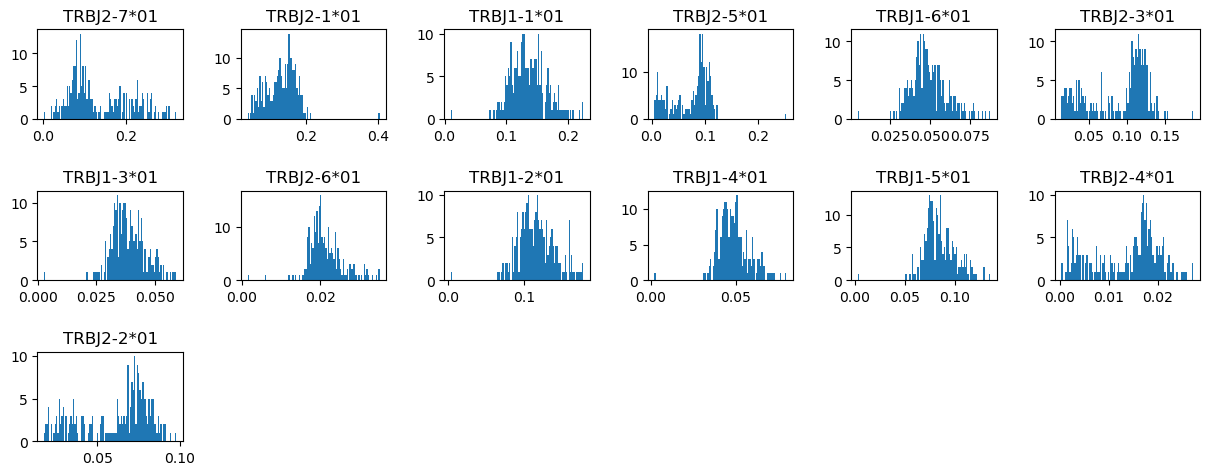

In [9]:
trbj_matrix_filtered = trbj_matrix.copy()
trbj_matrix_filtered = trbj_matrix_filtered.drop(['TRBJ2-2P*01'], axis=1)

plt.figure(figsize=(15,20))

for i, column in enumerate(trbj_matrix_filtered.columns):
    plt.subplot(10, 6, i+1)
    plt.hist(x=trbj_matrix_filtered[column], bins=100)
    plt.title(f'{column}') 
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()

In [15]:
trbj_matrix_filtered.to_csv('trbj_clean_batch.csv')

# Cluster maps

Here are the clustermaps for V and J genes based on the correlation matrix.

## V genes

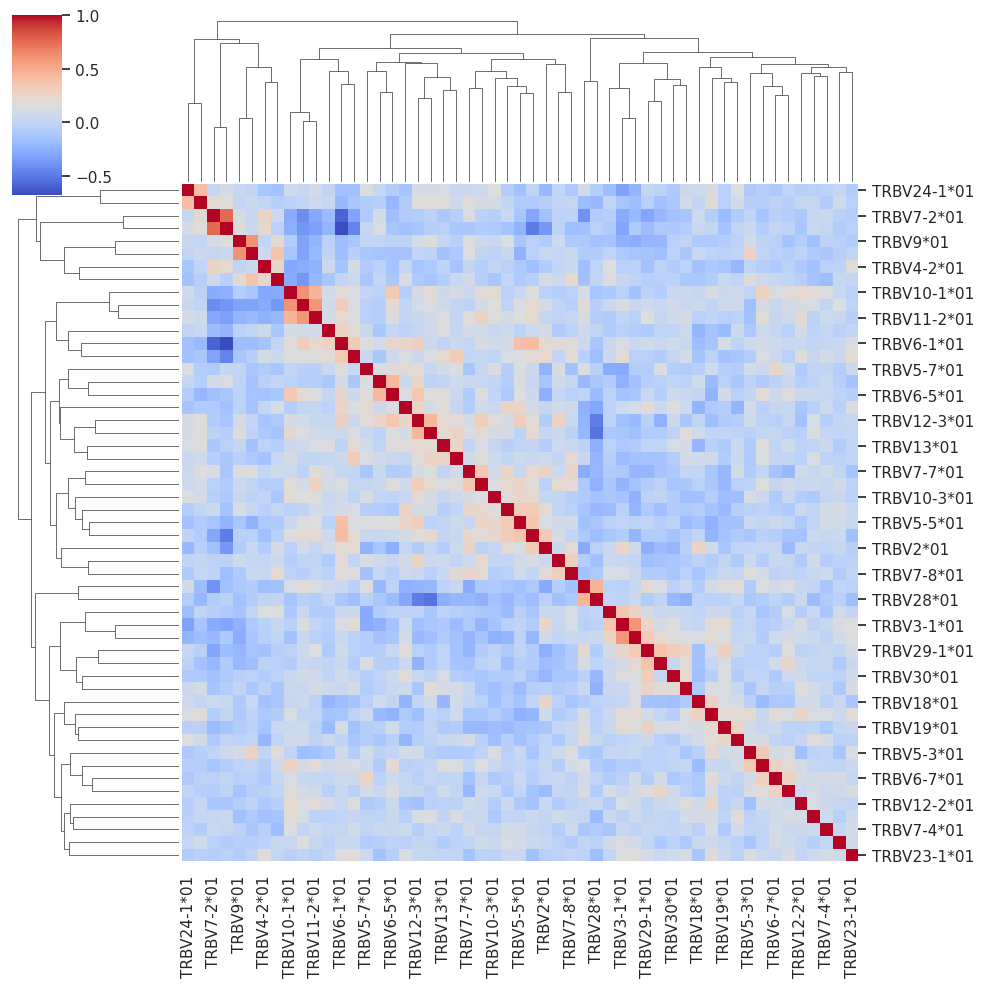

In [10]:
sns.set_theme(rc={'figure.figsize':(8.7,8.27)})

corr_v_matrix_filtered = trbv_matrix_filtered.corr() 
sns.clustermap(corr_v_matrix_filtered, cmap= 'coolwarm');

## J genes

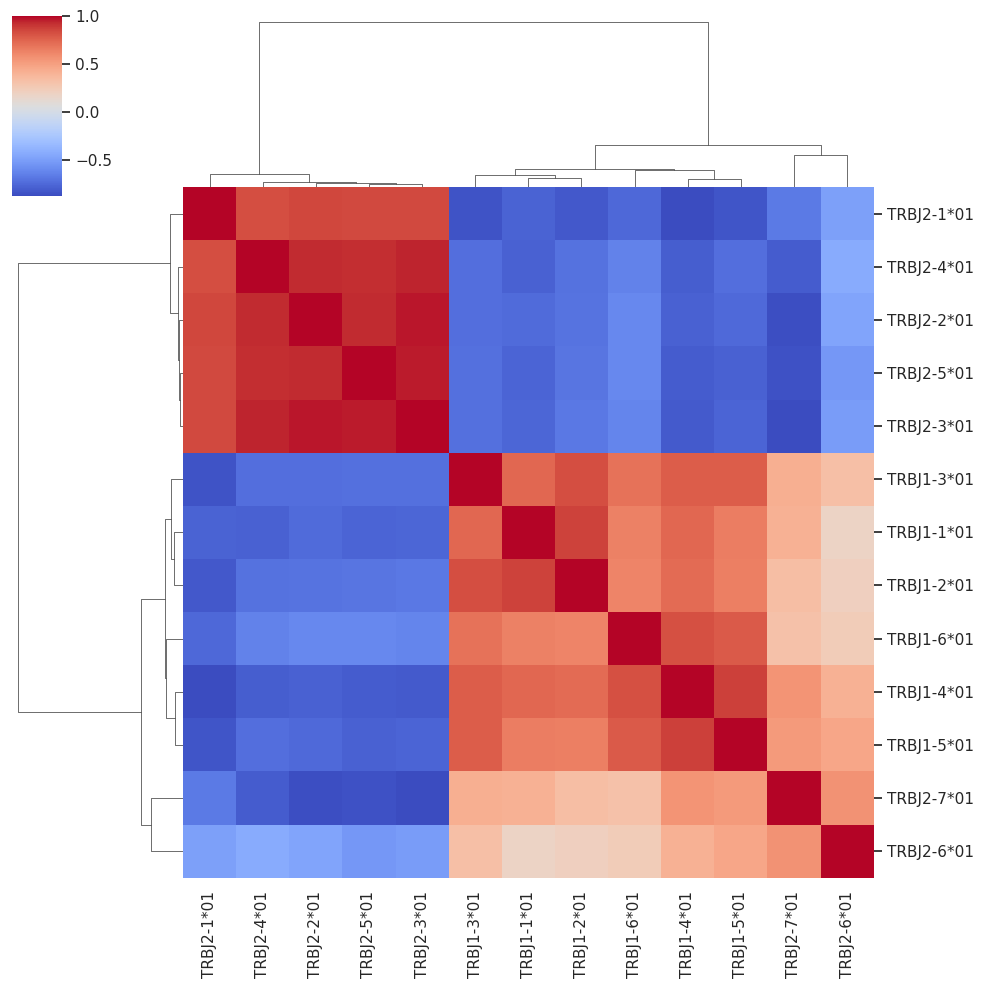

In [11]:
corr_j_matrix_filtered = trbj_matrix_filtered.corr() 
sns.clustermap(corr_j_matrix_filtered, cmap= 'coolwarm');

## V vs J genes

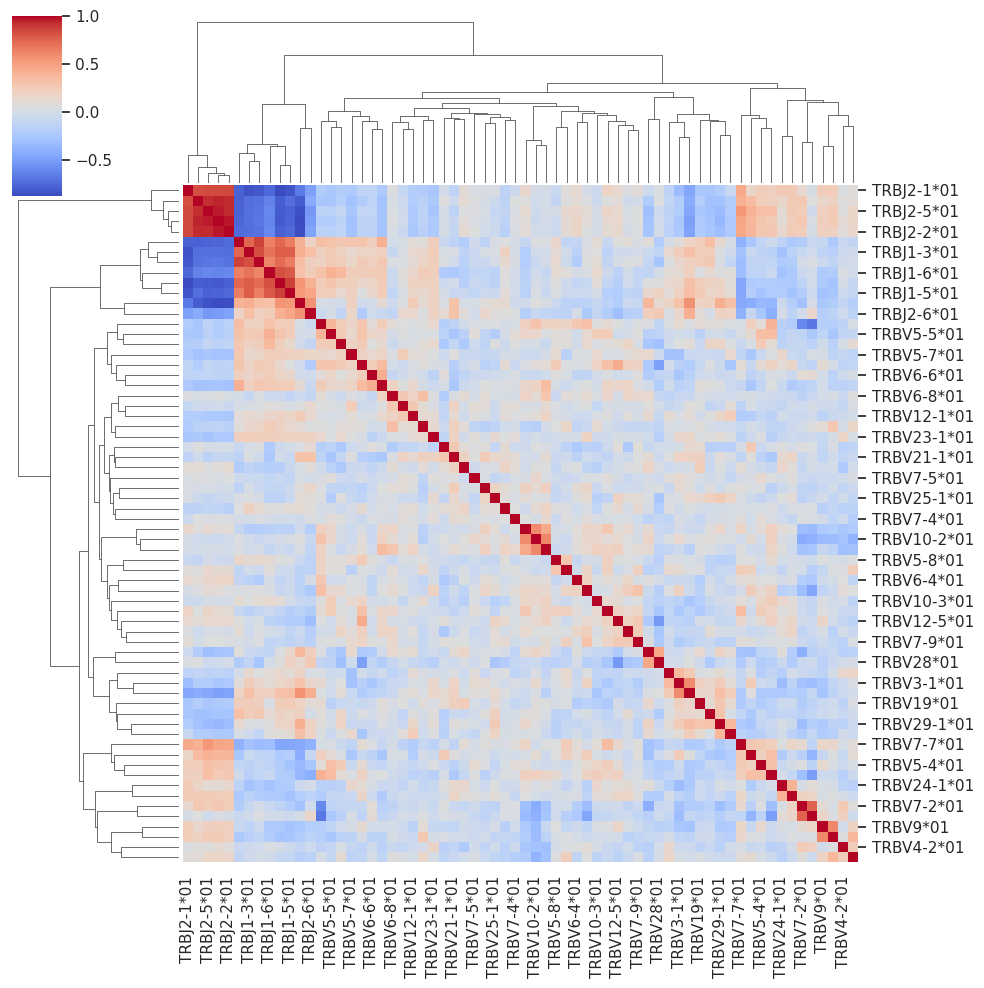

In [12]:
v_j_merged_filtered = pd.concat([trbj_matrix_filtered, trbv_matrix_filtered], axis=1)

corr_v_j_matrix_filtered = v_j_merged_filtered.corr()
sns.clustermap(corr_v_j_matrix_filtered, cmap= 'coolwarm');

# Heatmap for each patient

## J genes

At first, without normalization to the maximum:

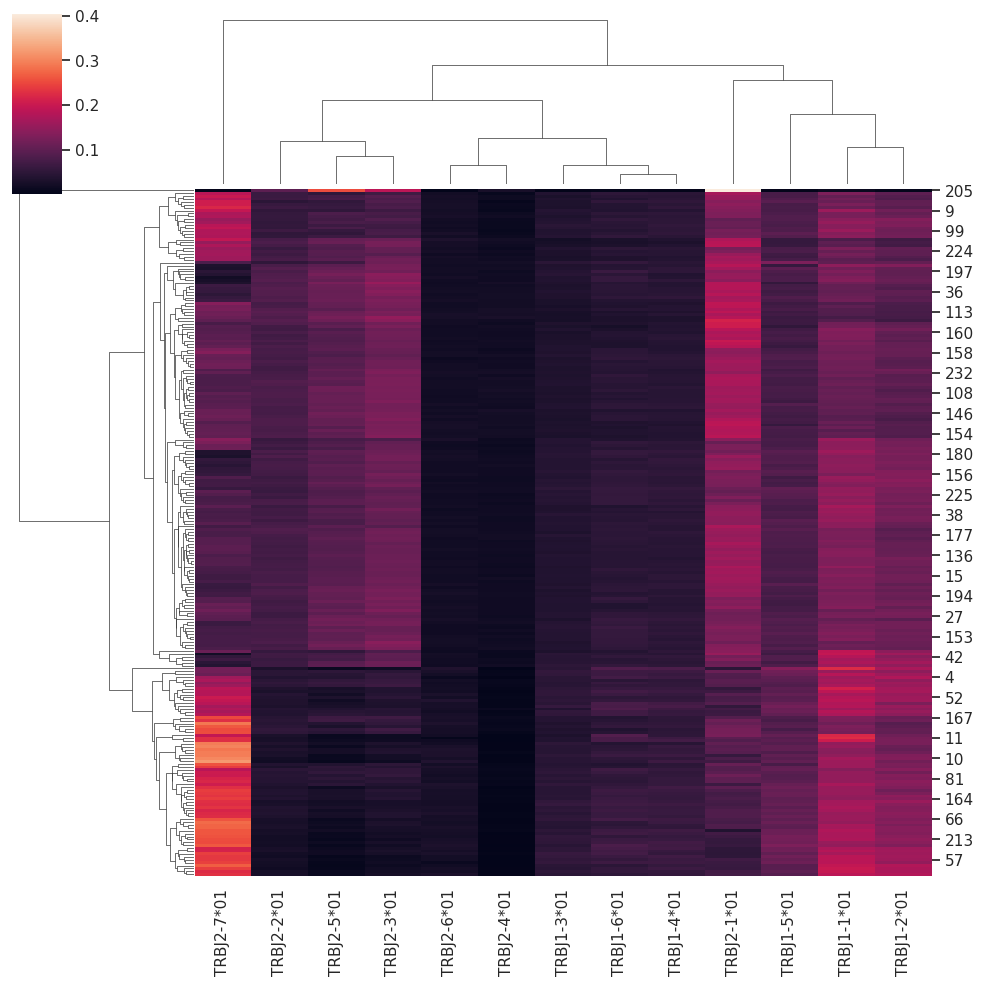

In [13]:
sns.clustermap(trbj_matrix_filtered);

In [14]:
trbj_matrix_filtered_max = trbj_matrix_filtered.copy()
trbj_matrix_filtered_max = trbj_matrix_filtered_max.apply(lambda column: column / column.max(), axis=0)
trbj_matrix_filtered_max

,TRBJ2-7*01,TRBJ2-1*01,TRBJ1-1*01,TRBJ2-5*01,TRBJ1-6*01,TRBJ2-3*01,TRBJ1-3*01,TRBJ2-6*01,TRBJ1-2*01,TRBJ1-4*01,TRBJ1-5*01,TRBJ2-4*01,TRBJ2-2*01
0,0.578450,0.135370,0.932536,0.102003,0.675682,0.199775,0.811072,0.631411,0.921611,0.740067,0.719686,0.136362,0.352289
1,0.711492,0.182806,0.731556,0.079377,0.726419,0.144256,0.893306,0.646974,0.877547,0.753561,0.746192,0.155035,0.273953
2,0.479032,0.251973,0.623034,0.275373,0.606671,0.459627,0.638737,0.578746,0.762780,0.603315,0.641962,0.430015,0.569314
3,0.577916,0.410832,0.576833,0.204054,0.576127,0.357807,0.625211,0.572821,0.554616,0.590364,0.564306,0.338242,0.634174
4,0.499960,0.208761,0.697329,0.152781,0.814379,0.279845,0.756062,0.366757,0.989249,0.799177,0.733509,0.126730,0.377894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.314920,0.363083,0.484401,0.377548,0.470860,0.698428,0.567821,0.655462,0.611471,0.489674,0.553075,0.849337,0.753316
233,0.743775,0.180034,0.683130,0.108197,0.708019,0.202233,0.726670,0.762032,0.715503,0.750498,0.817545,0.151228,0.380002
234,0.642939,0.340032,0.485185,0.212495,0.585537,0.462970,0.557291,0.652455,0.567013,0.644491,0.696291,0.261318,0.477552
235,0.367681,0.115808,0.994450,0.046442,0.970470,0.094935,0.770044,0.977635,0.959267,1.000000,1.000000,0.055562,0.317485


With normalization to the maximum.

Here you need to look at the vertical columns. There are genes that are used by one cohort of people and not by another.

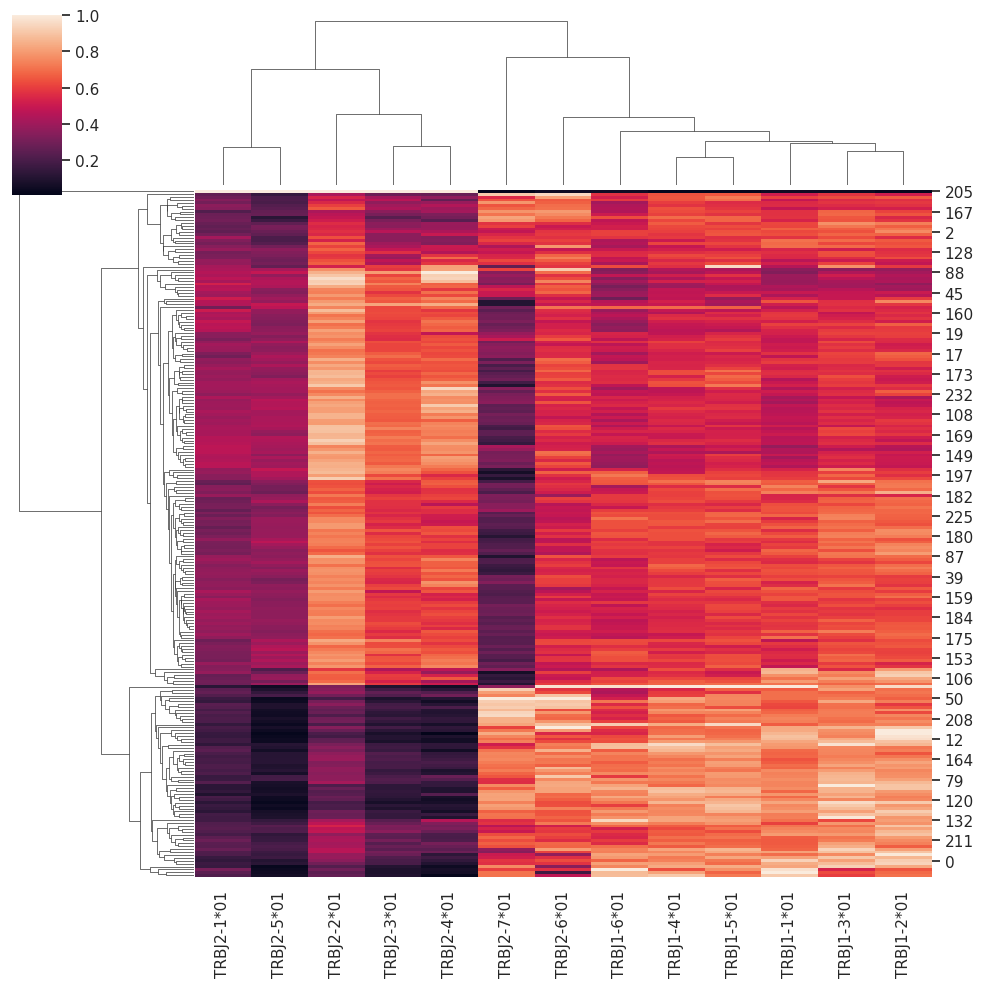

In [15]:
sns.clustermap(trbj_matrix_filtered_max);

## V genes

In [16]:
trbv_matrix_filtered_max = trbv_matrix_filtered.copy()

trbv_matrix_filtered_max = trbv_matrix_filtered_max.apply(lambda column: column / column.max(), axis=0)
trbv_matrix_filtered_max

,TRBV6-4*01,TRBV12-4*01,TRBV6-6*01,TRBV30*01,TRBV3-1*01,TRBV10-3*01,TRBV5-8*01,TRBV18*01,TRBV6-1*01,TRBV7-2*01,...,TRBV23-1*01,TRBV11-3*01,TRBV5-7*01,TRBV20-1*01,TRBV10-1*01,TRBV7-9*01,TRBV21-1*01,TRBV5-6*01,TRBV14*01,TRBV25-1*01
0,0.480713,0.219597,0.651729,0.633886,0.721100,0.660379,0.655179,0.521155,0.656175,0.611183,...,0.360097,0.299534,0.199610,0.498655,0.464159,0.689356,0.532710,0.566673,0.455345,0.323327
1,0.316366,0.278669,0.771585,0.674966,0.530097,0.430626,0.452259,0.802215,0.500314,0.734091,...,0.370552,0.620289,0.311761,0.706329,0.521056,0.669587,0.598337,0.515517,0.618017,0.481713
2,0.501999,0.155104,0.688126,0.257043,0.489864,0.533850,0.711613,0.691932,0.458402,0.769528,...,0.536236,0.517686,0.169184,0.583961,0.419637,0.702656,0.488351,0.489193,0.551893,0.342270
3,0.868829,0.374139,0.518714,0.506878,0.714702,0.654520,0.493349,0.610445,0.828343,0.372097,...,0.538958,0.311472,0.255065,0.705749,0.494258,0.757091,0.665753,0.483993,0.631498,0.639095
4,0.244996,0.473107,0.594046,0.329299,0.635368,0.760333,0.475315,0.429931,0.931074,0.400751,...,0.474104,0.253521,0.000000,0.661675,1.000000,0.959232,0.528225,0.582877,0.776961,0.574685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.273658,0.469738,0.709964,0.275057,0.478571,0.503280,0.629240,0.789063,0.432488,0.895270,...,0.333433,0.563364,0.355820,0.584698,0.562632,0.694459,0.716768,0.370385,1.000000,0.301146
233,0.537418,0.166047,0.569883,0.317006,0.959655,0.684931,0.645047,0.598089,0.763636,0.403874,...,0.499193,0.249141,0.332056,0.603798,0.694926,0.683849,0.556178,0.494250,0.612042,0.356334
234,0.861783,0.573852,0.528399,0.357578,0.414565,0.614828,0.845577,0.483556,0.499287,0.722189,...,0.488802,0.351436,0.000000,0.744790,0.363883,0.567203,0.384425,0.441166,0.607331,0.418236
235,0.558544,0.000000,0.682943,0.632491,0.230533,0.833372,0.639061,0.267316,0.733337,0.657617,...,0.415718,0.241354,0.527920,0.779774,0.526109,0.567743,0.379803,0.850461,0.545022,0.167971


/home/svinogradova/.conda/envs/haplotypes/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/svinogradova/.conda/envs/haplotypes/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


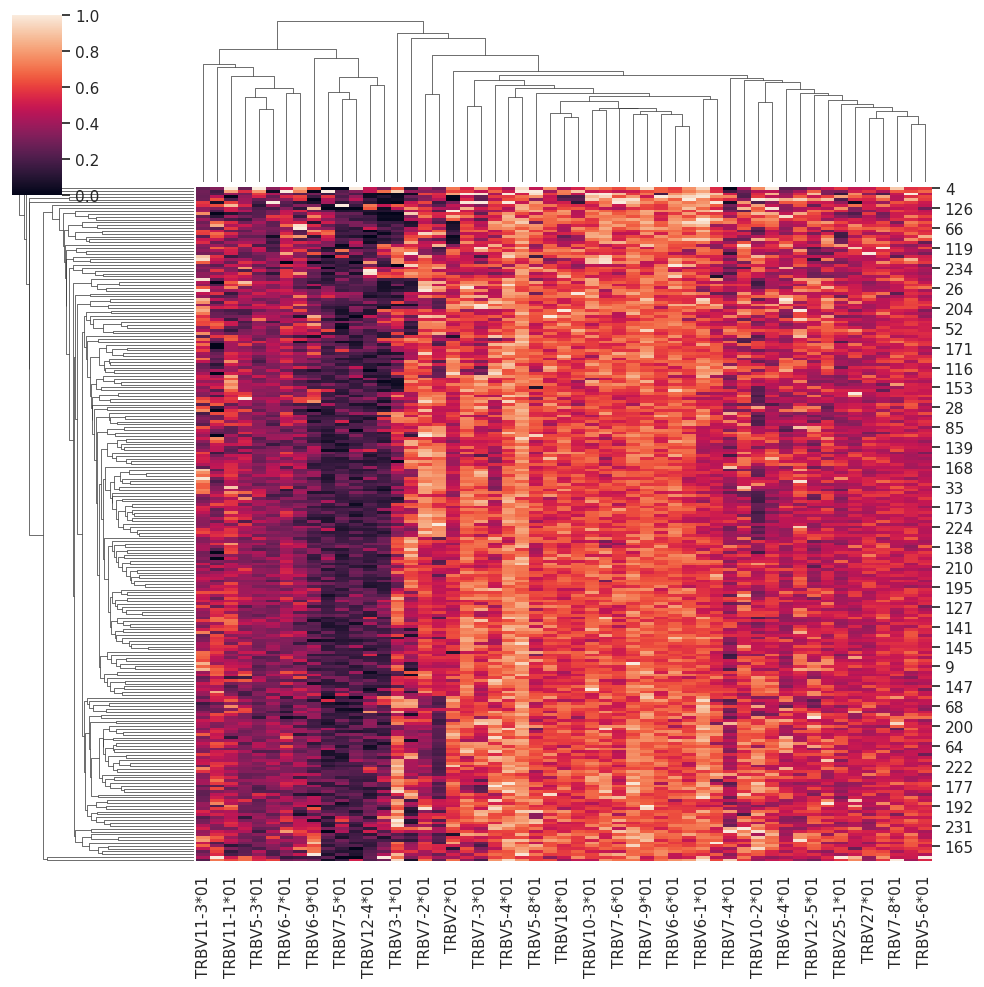

In [17]:
sns.clustermap(trbv_matrix_filtered_max);